In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:

len(x_train)

60000

In [5]:

len(x_test)

10000

In [12]:

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

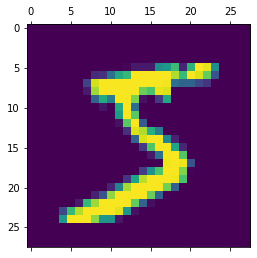

In [8]:

plt.matshow(x_train[0])

In [9]:
#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.6387 - accuracy: 0.8416 - val_loss: 0.3590 - val_accuracy: 0.9026
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3385 - accuracy: 0.9053 - val_loss: 0.2948 - val_accuracy: 0.9180
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.9172 - val_loss: 0.2657 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2625 - accuracy: 0.9252 - val_loss: 0.2436 - val_accuracy: 0.9330
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2393 - accuracy: 0.9330 - val_loss: 0.2254 - val_accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2205 - accuracy: 0.9377 - val_loss: 0.2107 - val_accuracy: 0.9400
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2042 - accuracy: 0.9424 - val_loss: 0.1938 - val_accuracy

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.9518
Loss=0.163
Accuracy=0.952


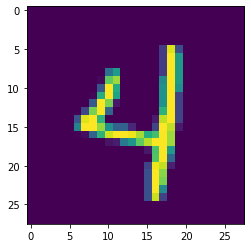

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [19]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 4


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

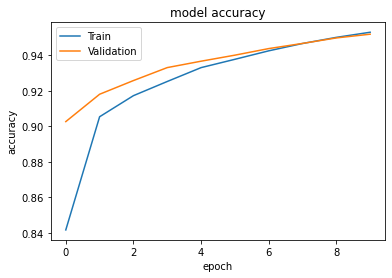

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph representing the model’s accuracy

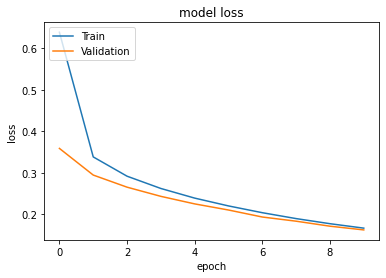

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph represents the model’s loss

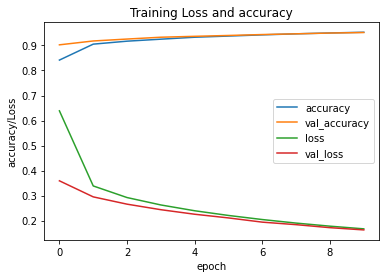

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [25]:
keras_model_path='C:\\Users\\admin'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\admin\assets


In [26]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)